In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
spark = SQLContext(sc)
sqlContext = SQLContext(sc)

In [2]:
wow_data = sqlContext.read.load('file:////home/deepannrr3037/wow_data_wtLabel_C.csv/', 
                          delimiter=',',
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [3]:
wow_data.show()

+---+--------+---------------+----------------+-------------+-----------+-------+-------+-------+--------+-----------+----------+-----------+-------------+------------+-----------+------------+-------------+-----------+----------+------------+-----+
|_c0|AvatarID|Total_days_actv|Actual_days_actv| Active_Ratio|Total_login|Level_l|Level_m|Level_h|Race_Orc|Race_Tauren|Race_Troll|Race_Undead|Class_Warrior|Class_Hunter|Class_Rogue|Class_Shaman|Class_Warlock|Class_Druid|Class_Mage|Class_Priest|Churn|
+---+--------+---------------+----------------+-------------+-----------+-------+-------+-------+--------+-----------+----------+-----------+-------------+------------+-----------+------------+-------------+-----------+----------+------------+-----+
|  0|     148|            748|              66|8.82352941176|       1202|      0|      0|      1|       0|          1|         0|          0|            0|           0|          0|           1|            0|          0|         0|           0|    1|


In [4]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
pd.options.display.mpl_style = 'default'

In [5]:
wow_data_pd = wow_data.toPandas()

In [6]:
wow_data_pd['Level_l']= wow_data_pd['Level_l'].astype('category')
wow_data_pd['Level_m']= wow_data_pd['Level_m'].astype('category')
wow_data_pd['Level_h']= wow_data_pd['Level_h'].astype('category')
wow_data_pd['Race_Orc']= wow_data_pd['Race_Orc'].astype('category')
wow_data_pd['Race_Tauren']= wow_data_pd['Race_Tauren'].astype('category')
wow_data_pd['Race_Troll']= wow_data_pd['Race_Troll'].astype('category')
wow_data_pd['Race_Undead']= wow_data_pd['Race_Undead'].astype('category')
wow_data_pd['Class_Warrior']= wow_data_pd['Class_Warrior'].astype('category')
wow_data_pd['Class_Hunter']= wow_data_pd['Class_Hunter'].astype('category')
wow_data_pd['Class_Rogue']= wow_data_pd['Class_Rogue'].astype('category')
wow_data_pd['Class_Shaman']= wow_data_pd['Class_Shaman'].astype('category')
wow_data_pd['Class_Warlock']= wow_data_pd['Class_Warlock'].astype('category')
wow_data_pd['Class_Druid']= wow_data_pd['Class_Druid'].astype('category')
wow_data_pd['Class_Mage']= wow_data_pd['Class_Mage'].astype('category')
wow_data_pd['Class_Priest']= wow_data_pd['Class_Priest'].astype('category')
wow_data_pd['Churn']= wow_data_pd['Churn'].astype('category')

In [7]:
wow_data_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
_c0,26165.0,13082.000000,7553.329233,0.000000,6541.000000,13082.000000,19623.0,26164.0
AvatarID,26165.0,13088.464131,7555.040379,0.000000,6547.000000,13088.000000,19630.0,26175.0
Total_days_actv,26165.0,590.118823,1044.298194,0.000000,0.000000,5.000000,729.0,4017.0
Actual_days_actv,26165.0,17.088745,41.990883,1.000000,1.000000,2.000000,11.0,332.0
Active_Ratio,15934.0,40.357686,61.017121,0.054615,1.117318,4.919914,62.5,200.0
Total_login,26165.0,370.782725,1342.756190,1.000000,2.000000,10.000000,87.0,43436.0


In [8]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
num_bins = 10

In [10]:
wow_data.filter(wow_data.Churn == 1).describe('Total_days_actv','Actual_days_actv','Active_Ratio','Total_login').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Total_days_actv,24259,635.3651428335876,1071.5101499594389,0,4017
Actual_days_actv,24259,17.536625582258132,43.514777166096884,1,332
Active_Ratio,14028,32.966761391452174,59.18680683958018,0.0546149645003,200.0
Total_login,24259,380.41073416051773,1390.4451344516908,1,43436


In [11]:
wow_data.filter(wow_data.Churn == 0).describe('Total_days_actv','Actual_days_actv','Active_Ratio','Total_login').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Total_days_actv,1906,14.237145855194123,9.575526823591412,1,28
Actual_days_actv,1906,11.388247639034628,8.357708081865947,2,28
Active_Ratio,1906,94.75427049777126,44.52242744453698,40.9090909091,200.0
Total_login,1906,248.24029380902414,357.7152344361856,2,3210


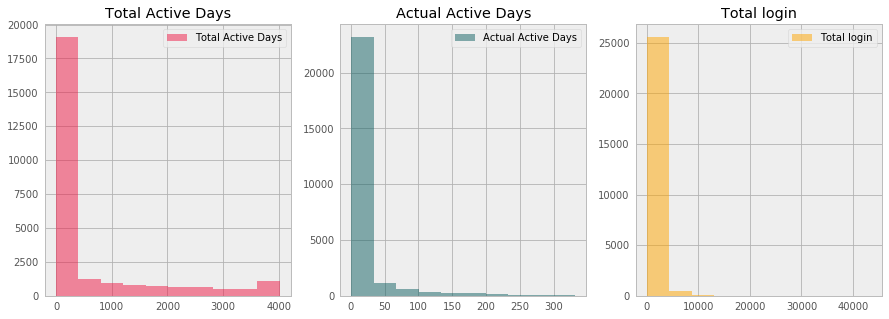

In [12]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

#Total Active Days
ax1 = fig.add_subplot(131)
ax1.hist(np.array(wow_data.select("Total_days_actv").collect()), num_bins, normed=0, facecolor='#ee1a46', alpha=0.5,label="Total Active Days")
plt.legend(loc='upper right')
plt.title("Total Active Days")

#Actual Active Days
ax2 = fig.add_subplot(132)
ax2.hist(np.array(wow_data.select("Actual_days_actv").collect()), num_bins, normed=0, facecolor='#116163', alpha=0.5,label="Actual Active Days")
plt.legend(loc='upper right')
plt.title("Actual Active Days")

#Total Login Count
ax3 = fig.add_subplot(133)
ax3.hist(np.array(wow_data.select("Total_login").collect()), num_bins, normed=0, facecolor='orange', alpha=0.5,label="Total login")
plt.legend(loc='upper right')
plt.title("Total login")

plt.show()

plt.show()

In [13]:
wow_data_pd.corr()

,_c0,AvatarID,Total_days_actv,Actual_days_actv,Active_Ratio,Total_login
_c0,1.000000,0.002681,-0.003216,-0.002908,0.006564,-0.004828
AvatarID,0.002681,1.000000,-0.456841,-0.320338,0.283750,-0.246793
Total_days_actv,-0.003216,-0.456841,1.000000,0.690411,-0.499537,0.510956
Actual_days_actv,-0.002908,-0.320338,0.690411,1.000000,-0.248161,0.884640
Active_Ratio,0.006564,0.283750,-0.499537,-0.248161,1.000000,-0.166998
Total_login,-0.004828,-0.246793,0.510956,0.884640,-0.166998,1.000000


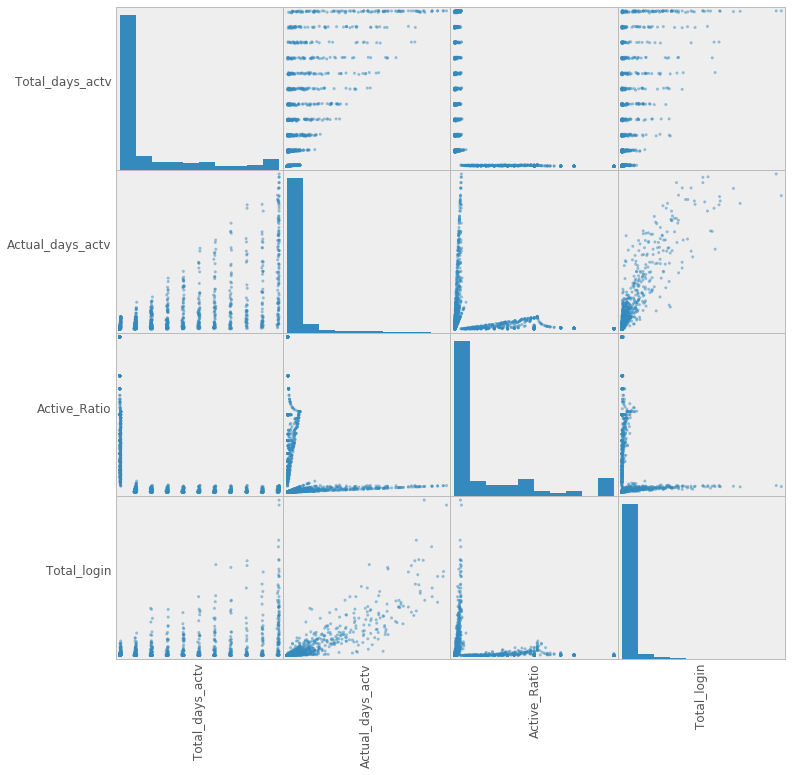

In [19]:


sampled_data = wow_data.select('Total_days_actv','Actual_days_actv','Active_Ratio','Total_login').sample(False, 0.10).toPandas()

axs = pd.scatter_matrix(sampled_data, figsize=(12, 12));

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [20]:
wow_data_dt = wow_data.select("Level_l","Level_m","Level_h","Race_Orc","Race_Tauren","Race_Troll","Race_Undead","Class_Warrior","Class_Hunter","Class_Rogue",
                              "Class_Shaman","Class_Warlock","Class_Druid","Class_Mage","Class_Priest","Churn")

In [21]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import DecisionTree

def labelData(data):
    # label: row[end], features: row[0:end-1]
    return data.rdd.map(lambda row: LabeledPoint(row[-1], row[:-1]))

training_data, testing_data = labelData(wow_data_dt).randomSplit([0.8, 0.2])

model = DecisionTree.trainClassifier(training_data, numClasses=2, maxDepth=2,
                                     categoricalFeaturesInfo = {0:2,1:2,2:2,3:2,4:2,5:2,6:2,7:2,8:2,9:2,10:2,11:2,12:2,13:2,14:2},
                                     impurity='gini', maxBins=32)

print model.toDebugString()

DecisionTreeModel classifier of depth 2 with 7 nodes
  If (feature 0 in {0.0})
   If (feature 1 in {1.0})
    Predict: 1.0
   Else (feature 1 not in {1.0})
    Predict: 1.0
  Else (feature 0 not in {0.0})
   If (feature 14 in {1.0})
    Predict: 1.0
   Else (feature 14 not in {1.0})
    Predict: 1.0



In [22]:
print 'Feature 5:', wow_data_dt.columns[5]
print 'Feature 1: ', wow_data_dt.columns[1]

Feature 5: Race_Troll
Feature 1:  Level_m


In [23]:
from pyspark.mllib.evaluation import MulticlassMetrics

def getPredictionsLabels(model, test_data):
    predictions = model.predict(test_data.map(lambda r: r.features))
    return predictions.zip(test_data.map(lambda r: r.label))

def printMetrics(predictions_and_labels):
    metrics = MulticlassMetrics(predictions_and_labels)
    print 'Precision of True ', metrics.precision(1)
    print 'Precision of False', metrics.precision(0)
    print 'Recall of True    ', metrics.recall(1)
    print 'Recall of False   ', metrics.recall(0)
    print 'F-1 Score         ', metrics.fMeasure()
    print 'Confusion Matrix\n', metrics.confusionMatrix().toArray()

predictions_and_labels = getPredictionsLabels(model, testing_data)

printMetrics(predictions_and_labels)

Precision of True  0.929377990431
Precision of False 0.0
Recall of True     1.0
Recall of False    0.0
F-1 Score          0.929377990431
Confusion Matrix
[[    0.   369.]
 [    0.  4856.]]
